### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
processed_data = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd())) + '/' +'processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [3]:
initial_data = pd.read_csv(os.path.dirname(os.path.dirname(os.getcwd())) + '/' + 'taxi_dataset.csv', index_col='id')

initial_data.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
id,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [4]:
initial_data.shape[0] == processed_data.shape[0]

True

In [5]:
### Вернем в датасет колонку pickup_datetime

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [6]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [7]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [8]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

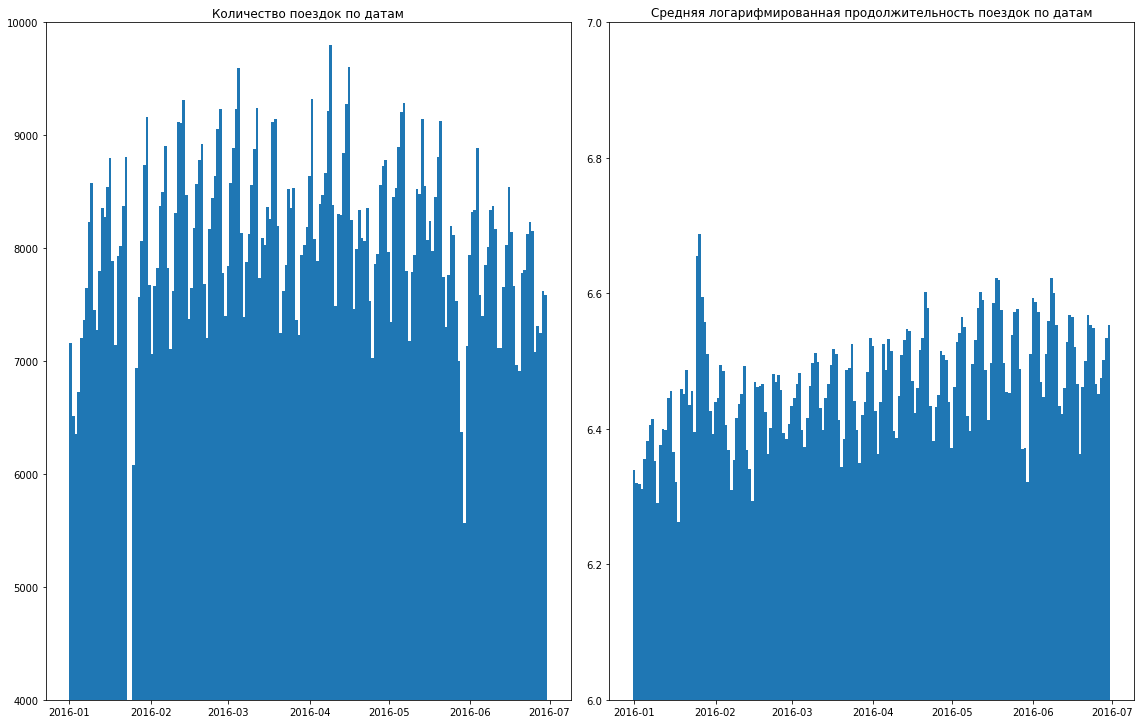

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


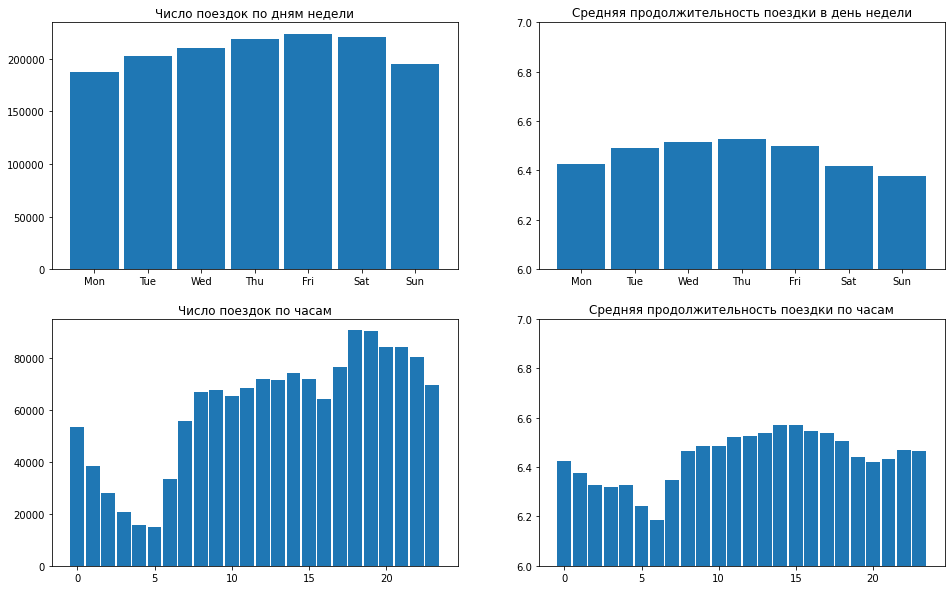

In [10]:
### Your code is here
fig = plt.figure()

fig.set_size_inches(16, 10)
labels_d = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

ax_1 = fig.add_subplot(2, 2, 1) # 1й график в сетке 3х2
plt.bar(sorted(list(processed_data['day_of_week'].unique())),
        processed_data.groupby('day_of_week', as_index=False)[
    'log_trip_duration'].count()['log_trip_duration'],
    width=0.9
)
plt.xticks(list(range(7)), labels=labels_d)

ax_2 = fig.add_subplot(2, 2, 2)
plt.bar(sorted(list(processed_data['day_of_week'].unique())), 
        processed_data.groupby('day_of_week', as_index=False)[
    'log_trip_duration'].mean()['log_trip_duration'],
    width=0.9
)
plt.xticks(list(range(7)), labels=labels_d)
plt.ylim((6, 7))

ax_3 = fig.add_subplot(2, 2, 3) # 1й график в сетке 3х2
plt.bar(sorted(list(processed_data['hour'].unique())),
        processed_data.groupby('hour', as_index=False)[
    'log_trip_duration'].count()['log_trip_duration'],
    width=0.9
)

ax_4 = fig.add_subplot(2, 2, 4)
plt.bar(sorted(list(processed_data['hour'].unique())),
        processed_data.groupby('hour', as_index=False)[
    'log_trip_duration'].mean()['log_trip_duration'],
    width=0.9
)
plt.ylim((6, 7))

ax_1.set(title='Число поездок по дням недели')
ax_2.set(title='Средняя продолжительность поездки в день недели')
ax_3.set(title='Число поездок по часам')
ax_4.set(title='Средняя продолжительность поездки по часам')
plt.show()



In [11]:
pd.pivot_table(processed_data, columns='day_of_week', index='hour', values='log_trip_duration', aggfunc=np.mean) 

day_of_week,0,1,2,3,4,5,6
hour,,,,,,,
0,6.328173,6.353598,6.361024,6.368642,6.433067,6.486600,6.465794
1,6.289221,6.316450,6.290582,6.287852,6.368686,6.417126,6.423073
2,6.260257,6.277271,6.226347,6.280400,6.297224,6.365256,6.353585
3,6.321038,6.241751,6.256435,6.272725,6.311585,6.323040,6.350705
4,6.325626,6.329338,6.284243,6.285450,6.369078,6.339929,6.325216
5,6.256471,6.140184,6.122148,6.193495,6.278671,6.357487,6.341709
6,6.184772,6.155556,6.162004,6.175040,6.198555,6.238505,6.280519
7,6.359147,6.371453,6.388129,6.383752,6.362452,6.169255,6.160052
8,6.498381,6.520274,6.527269,6.539392,6.500891,6.194081,6.112782


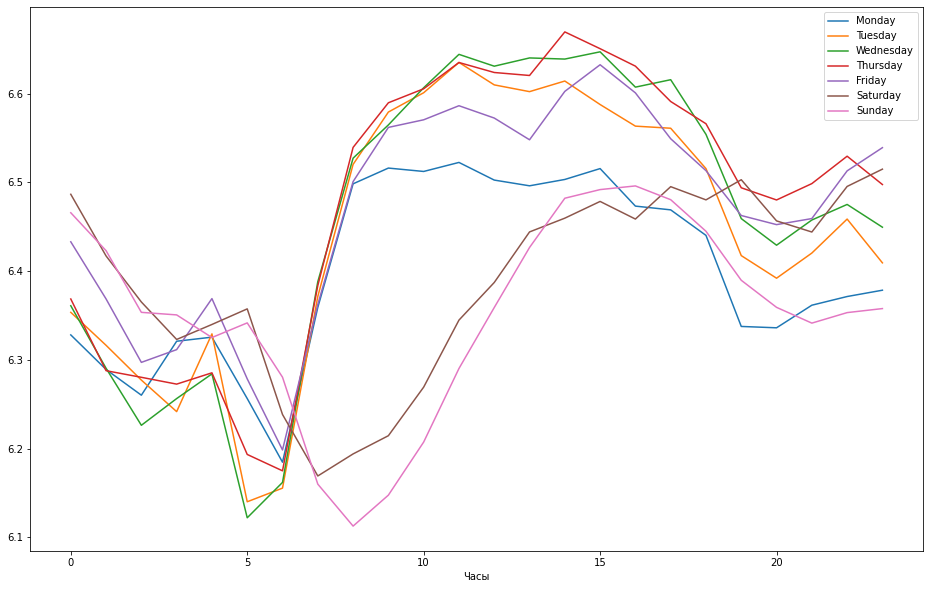

In [12]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(pd.pivot_table(processed_data, columns='day_of_week', index='hour', values='log_trip_duration', aggfunc=np.mean))
plt.legend(['Monday', 'Tuesday', 'Wednesday',
           'Thursday', 'Friday', 'Saturday', 'Sunday', ])
plt.xlabel('Часы')


plt.show()


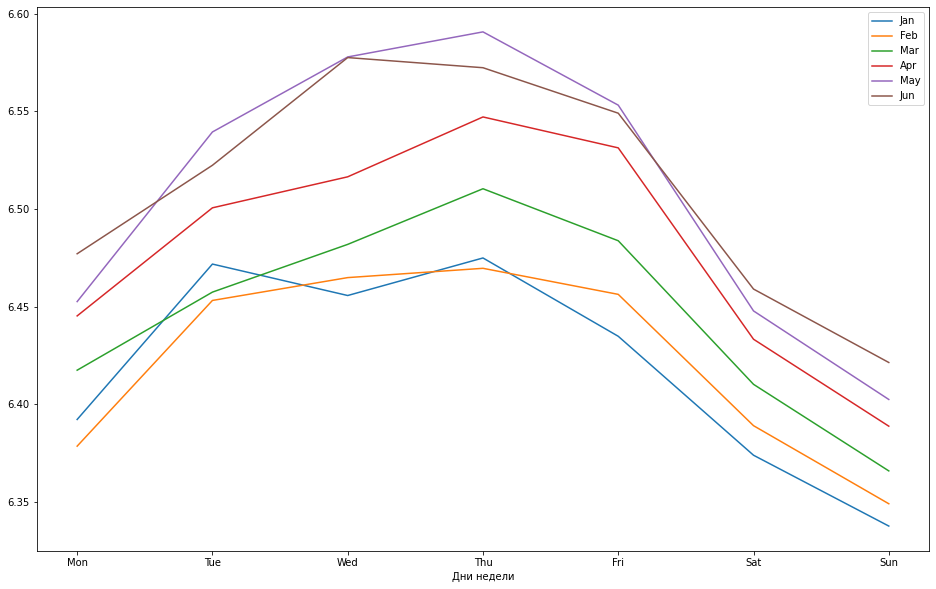

In [13]:
fig = plt.figure()
fig.set_size_inches(16, 10)

plt.plot(pd.pivot_table(processed_data, columns='month',
         index='day_of_week', values='log_trip_duration', aggfunc=np.mean))
plt.legend(sorted(list(processed_data.month.unique())))
plt.xlabel('Дни недели')
plt.xticks(list(range(7)), labels=labels_d)
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.show()


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [14]:
### Создадим первый бинарный признак
### Your code is here
import datetime

processed_data['anomaly'] = np.where(processed_data['date'] ==  datetime.date(2016, 1, 23), 1, 0)
processed_data.groupby('anomaly').count()


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
anomaly,,,,,,,,,,
0,1456996,1456996,1456996,1456996,1456996,1456996,1456996,1456996,1456996,1456996
1,1648,1648,1648,1648,1648,1648,1648,1648,1648,1648


In [15]:
### Создадим второй бинарный признак
### Your code is here

max_table = processed_data.groupby(['day_of_week', 'hour'], as_index=False).mean().sort_values('log_trip_duration', ascending=False).head(10)
processed_data['traffic_jam'] = np.where((processed_data.day_of_week.isin(max_table.day_of_week.unique())) & (processed_data.hour.isin(max_table.hour.unique())), 1, 0)


In [16]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [17]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [18]:
### Делаем OneHotEncoding и конкатим с processed_data


for col in ['day_of_week', 'hour', 'month']:
    processed_data = pd.concat((processed_data, pd.get_dummies(processed_data[col], drop_first=True, prefix=f'{col}')), axis=1)
    processed_data = processed_data.drop([col], axis=1)

In [19]:
processed_data.head().to_csv('7_4.csv', sep=',')
processed_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 41 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   passenger_count     1458644 non-null  float64
 2   store_and_fwd_flag  1458644 non-null  int64  
 3   distance_km         1458644 non-null  float64
 4   log_trip_duration   1458644 non-null  float64
 5   anomaly             1458644 non-null  int64  
 6   traffic_jam         1458644 non-null  int64  
 7   day_of_week_1       1458644 non-null  uint8  
 8   day_of_week_2       1458644 non-null  uint8  
 9   day_of_week_3       1458644 non-null  uint8  
 10  day_of_week_4       1458644 non-null  uint8  
 11  day_of_week_5       1458644 non-null  uint8  
 12  day_of_week_6       1458644 non-null  uint8  
 13  hour_1              1458644 non-null  uint8  
 14  hour_2              1458644 non-null  uint8  
 15  hour_3    

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [20]:
### Your code is here

processed_data[['distance_km', 'passenger_count']].corr()


,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [21]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

X = processed_data.drop('log_trip_duration', axis=1)
Y = processed_data['log_trip_duration']

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(X, Y)
X.columns[sfs.get_support()]

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [23]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
X.columns[sfs.get_support()]

Index(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'], dtype='object')

In [25]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

X_new = sfs.transform(X)

model.fit(X_new, Y)
np.mean((model.predict(X_new) - Y) ** 2)


0.41442593568934355